In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)
print("Seaborn Version: " + sns.__version__)

Pandas Version: 1.1.2
Numpy Version: 1.19.2
Seaborn Version: 0.11.0


In [2]:
df = pd.read_csv("../data/call_a_bike/OPENDATA_BOOKING_CALL_A_BIKE.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228298 entries, 0 to 16228297
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   BOOKING_HAL_ID             int64  
 1   CATEGORY_HAL_ID            int64  
 2   VEHICLE_HAL_ID             int64  
 3   CUSTOMER_HAL_ID            object 
 4   DATE_BOOKING               object 
 5   DATE_FROM                  object 
 6   DATE_UNTIL                 object 
 7   COMPUTE_EXTRA_BOOKING_FEE  object 
 8   TRAVERSE_USE               object 
 9   DISTANCE                   float64
 10  START_RENTAL_ZONE          object 
 11  START_RENTAL_ZONE_HAL_ID   float64
 12  END_RENTAL_ZONE            object 
 13  END_RENTAL_ZONE_HAL_ID     float64
 14  RENTAL_ZONE_HAL_SRC        object 
 15  CITY_RENTAL_ZONE           object 
 16  TECHNICAL_INCOME_CHANNEL   object 
dtypes: float64(3), int64(3), object(11)
memory usage: 2.1+ GB


In [3]:
df.sample(10)

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
7953483,33340657,51000,143545,3651414480B29E03C5F83DE36B982C0C1788D22E,2015-10-04 14:59:32,2015-10-04 14:59:32,2015-10-04 15:10:37,Nein,Nein,0.0,Burgstraße/Hammer Landstraße,131639.0,Kurt-Schumacher-Allee / Nagelsweg,131651.0,Standort,Hamburg,Terminal HH_8 (-2561-)
7580203,32771337,51000,143671,D8FCE21AD1BD232F998CE612CAE825F0B0D0CA3B,2015-09-08 15:00:37,2015-09-08 15:00:37,2015-09-08 15:05:49,Nein,Nein,0.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Steinstraße / Deichtorplatz,131654.0,Standort,Hamburg,Android SRH
15485898,45168117,51000,110864,5D899B2B85BB2E405A126334B06AA061B8221D46,2017-03-29 16:02:43,2017-03-29 16:02:43,2017-03-29 16:30:43,Ja,Nein,0.0,Martinistraße / Haupteingang Klinikum,140793.0,Dürerstraße/Beslerplatz- S Bahn Othmarschen,244946.0,Standort,Hamburg,Android SRH
3687094,26693945,50000,107802,B5BF7A51A9C4402AEA0F0FD93E390815361AC11D,2014-10-22 13:51:25,2014-10-22 13:51:25,2014-10-22 14:00:13,Nein,Nein,0.0,Stiglmaierplatz,40568.0,NaN,49088.0,Standort,München,iPhone CAB
13049875,41113504,51000,120003,044C642CC86A104417B3D7235E25730A9E1BEB42,2016-09-08 12:39:34,2016-09-08 12:39:34,2016-09-08 13:01:20,Nein,Nein,0.0,Horner Rennbahn/ Meurer Weg,244938.0,Lohmühlenstraße / Steindamm,140791.0,Standort,Hamburg,Techniker HH_191 (-2566-)
12279190,40056197,50000,119041,7CB8913BFFF33F31FA47C37FF816599A4B06DEB1,2016-08-03 21:51:51,2016-08-03 21:51:51,2016-08-03 21:58:39,Nein,Nein,0.0,7110 Eberhardstraße,62969.0,7400 Marienplatz,62689.0,Standort,Stuttgart,iPhone SRH
11947569,39607724,50000,165642,313A813C848F0A9BB05EFB3E7D4767A77C6A2DF4,2016-07-20 10:11:33,2016-07-20 10:11:33,2016-07-20 10:18:30,Nein,Nein,0.0,Studierendenhaus Jügelstraße / Mertonstraße,23722.0,Lise-Meitner-Str./ Kreuznacherstr. (Novotel),6723.0,Standort,Frankfurt am Main,iPhone CAB
4359867,27852149,51000,120605,B9846EA7F4F221D852EF1E07CB93659838CDBBDE,2015-01-16 13:30:19,2015-01-16 13:30:19,2015-01-16 13:35:24,Nein,Nein,0.0,Gänsemarkt / Büschstraße,131884.0,Universität / Moorweidenstraße,131882.0,Standort,Hamburg,iPhone SRH
1252635,23327608,51000,143821,5EC865AF011E1E1C70E6DED427FBBC8B90E24C0D,2014-05-20 19:21:08,2014-05-20 19:21:08,2014-05-20 19:47:41,Nein,Nein,0.0,Osakaallee/Übersee Quartier,201329.0,Eppendorfer Weg/Hoheluftchaussee,198086.0,Standort,Hamburg,iPhone CAB
10219709,37191027,50000,119301,E996D0A03672C16965466CD77A8CD7B4BCDC9084,2016-05-01 18:00:40,2016-05-01 18:00:40,2016-05-01 18:18:50,Nein,Nein,0.0,NaN,12155.0,NaN,29525.0,Standort,Berlin,Techniker B_55 (-115-)


In [4]:
# Select trips made in Hamburg

trips = df[df.CITY_RENTAL_ZONE == "Hamburg"]

In [5]:
trips.isna().sum()

BOOKING_HAL_ID                    0
CATEGORY_HAL_ID                   0
VEHICLE_HAL_ID                    0
CUSTOMER_HAL_ID                   0
DATE_BOOKING                      0
DATE_FROM                         0
DATE_UNTIL                        0
COMPUTE_EXTRA_BOOKING_FEE         0
TRAVERSE_USE                      0
DISTANCE                        224
START_RENTAL_ZONE               429
START_RENTAL_ZONE_HAL_ID        246
END_RENTAL_ZONE                 255
END_RENTAL_ZONE_HAL_ID          250
RENTAL_ZONE_HAL_SRC             224
CITY_RENTAL_ZONE                  0
TECHNICAL_INCOME_CHANNEL     120066
dtype: int64

In [6]:
# Drop NaN rows since the amount is negligible

trips = trips.dropna()
trips.describe()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DISTANCE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID
count,8.821838e+06,8821838.0,8.821838e+06,8821838.0,8.821838e+06,8.821838e+06
mean,3.361258e+07,51000.0,1.212862e+05,0.0,1.702775e+05,1.706134e+05
std,7.296034e+06,0.0,1.071902e+04,0.0,4.173084e+04,4.178055e+04
min,2.136679e+07,51000.0,1.060220e+05,0.0,1.315430e+05,1.315430e+05
25%,2.705007e+07,51000.0,1.165570e+05,0.0,1.318870e+05,1.318880e+05
50%,3.339544e+07,51000.0,1.199210e+05,0.0,1.407960e+05,1.407960e+05
75%,3.996944e+07,51000.0,1.205110e+05,0.0,2.117090e+05,2.117090e+05
max,4.638670e+07,51000.0,1.438660e+05,0.0,2.683580e+05,2.683580e+05


In [7]:
# Select and rename usable columns

trips = trips[[
    "VEHICLE_HAL_ID",
    "CUSTOMER_HAL_ID",
    "DATE_FROM",
    "DATE_UNTIL",
    "START_RENTAL_ZONE",
    "START_RENTAL_ZONE_HAL_ID",
    "END_RENTAL_ZONE",
    "END_RENTAL_ZONE_HAL_ID",
    "TECHNICAL_INCOME_CHANNEL",
]].copy()
trips.columns = [
    "bike_id",
    "user_id",
    "date_from",
    "date_until",
    "from_station_name", 
    "from_station_id",
    "to_station_name",
    "to_station_id",
    "booked_via"
]

In [8]:
# Calculate duration in minutes (rounded up) for each trip

def calculate_duration_in_min(date_from, date_until):
    duration_in_seconds = pd.to_datetime(date_until) - pd.to_datetime(date_from)
    return np.ceil(duration_in_seconds / pd.Timedelta(minutes=1))

trips.loc[:, "duration_in_min"] = calculate_duration_in_min(trips["date_from"], trips["date_until"])

In [9]:
# Convert float to integer values where appropriate

trips["from_station_id"] = trips["from_station_id"].astype(int)
trips["to_station_id"] = trips["to_station_id"].astype(int)
trips["duration_in_min"] = trips["duration_in_min"].astype(int)

In [10]:
# Remove trips shorter than 3 minutes starting and ending at the same station
# These are probably trips that were not intentional or canceled due to issues with the bike

mask = (trips.duration_in_min < 3) & (trips.from_station_id == trips.to_station_id)
trips = trips.drop(trips[mask].index)

In [11]:
# Handling 'booked_via' that start with 'Techniker'

maintenance = trips[trips["booked_via"].str.contains("Techniker")]
trips_without_maintenance = pd.concat([trips, maintenance]).drop_duplicates(keep=False)

tmp = trips_without_maintenance.loc[trips_without_maintenance.user_id.isin(maintenance.user_id.unique())]
print('Number of trips with a user ID that booked via Techniker before: %s' % len(tmp.index))
tmp = trips_without_maintenance.loc[~trips_without_maintenance.user_id.isin(maintenance.user_id.unique())]
print('Number of trips with a user ID that did not book via Techniker before: %s' % len(tmp.index))

# Assuming 'Techniker' means maintenance personnel is probably faulty.
# Around 50% of the user IDs are contained in the non-maintenance trip data set.

Number of trips with a user ID that booked via Techniker before: 3858067
Number of trips with a user ID that did not book via Techniker before: 3841343


In [12]:
maintenance.sample(5)

,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min
420764,120574,7A0079EE96B0171F84A1EFEAB73150B79E07851B,2014-03-13 00:51:23,2014-03-13 01:03:38,Wiesendamm/Roggenkamp,212607,Borgweg/Stadtpark,198088,Techniker HH_139 (-2351-),13
9209701,119989,2754C155C7067060040ACB7E14815AFF5ECC2678,2016-02-08 10:01:13,2016-02-08 10:20:43,Bebelallee/Meenkwiese,213855,Weidestraße /Johannes-Prassek-Park,247852,Techniker HH_124 (-2383-),20
1715762,120026,316792436E31768467921A14A38CE857F5D1CFAD,2014-06-17 14:17:30,2014-06-17 14:31:01,St.Petersburger Straße/Bei den Kirchhöfen,213235,Eimsbütteler Straße/Waterloostraße,131644,Techniker HH_132 (-2512-),14
11124670,120409,07F2AB6C2D2A9F367258E5ACFAC4AA9BBD71AEA7,2016-06-11 19:29:52,2016-06-11 19:36:23,Weidestraße/Biedermannplatz,211922,Jarrestraße / Rambatzweg,138376,Techniker HH_119 (-2334-),7
5470331,119155,DE6CE3A2CC04641AF42BD922D0D2D8BDF85BDE47,2015-05-14 16:41:09,2015-05-14 18:17:10,Neumühlen/Övelgönne,213856,Neumühlen/Övelgönne,213856,Techniker HH_135 (-2151-),97


In [13]:
# Remove outliers based on trip duration

threshold = trips.duration_in_min.quantile(0.9)
print('Trip duration threshold: %s minutes' % threshold)

trips = trips[trips.duration_in_min <= threshold]
trips.describe()

Trip duration threshold: 32.0 minutes


,bike_id,from_station_id,to_station_id,duration_in_min
count,7.554629e+06,7.554629e+06,7.554629e+06,7.554629e+06
mean,1.212814e+05,1.698610e+05,1.702034e+05,1.390638e+01
std,1.074445e+04,4.159115e+04,4.161839e+04,7.221086e+00
min,1.060220e+05,1.315430e+05,1.315430e+05,1.000000e+00
25%,1.164970e+05,1.318850e+05,1.318870e+05,8.000000e+00
50%,1.199190e+05,1.407960e+05,1.407960e+05,1.300000e+01
75%,1.205110e+05,2.117060e+05,2.117060e+05,1.900000e+01
max,1.438660e+05,2.683580e+05,2.683580e+05,3.200000e+01


<AxesSubplot:xlabel='duration_in_min'>

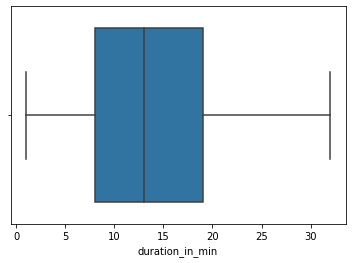

In [14]:
sns.boxplot(x=trips['duration_in_min'])

In [15]:
trips.sample(5)

,bike_id,user_id,date_from,date_until,from_station_name,from_station_id,to_station_name,to_station_id,booked_via,duration_in_min
2664139,120300,5EEA107946A1662654486F2FC184DBA8BBC191AB,2014-08-11 20:06:50,2014-08-11 20:14:42,Leinpfad/Fernsicht,224650,Hudtwalckerstraße / Bebelallee,138378,IVR,8
2061514,119923,F19A5F174706AC14A7006424F2AD6E1AAB735C55,2014-07-09 00:31:28,2014-07-09 00:53:42,Amsinckstraße/ Nordkanalbrücke,218174,Bartholomäusstraße/Beim Alten Schützenhof,211923,IVR,23
13251218,119999,09A2F13E505540537DE437635950FF815CC5D1B1,2016-09-16 09:37:32,2016-09-16 09:46:28,Sievekingplatz/Gorch-Fock-Wall,164033,Rödingsmarkt / Großer Burstah,131885,Techniker HH_83 (-2526-),9
9214277,119920,BCAD506D6F167FFE6A859D7EFEC63166376CAB70,2016-02-08 19:35:14,2016-02-08 19:44:13,Hallerstraße / Rohtenbaumchaussee,137995,Löwenstraße/Eppendorfer Weg,213680,iPhone SRH,9
11952165,119430,33B50CDC2D1CC3F2AD11B8AB7A3FE01A079875AD,2016-07-20 14:49:29,2016-07-20 14:59:36,Bahnhof Dammtor Süd / Marseiller Straße,138382,Jungfernstieg / Ballindamm,131879,iPhone SRH,11


In [16]:
# Save clean data set as CSV

trips.to_csv('../data/clean/trips.csv', index=False)

In [42]:
# Save all individual station names as data set

names = sorted(set(trips.from_station_name.unique().tolist() + trips.to_station_name.unique().tolist()))
stations = pd.DataFrame(names, columns=['station_name'])
stations.to_csv('../data/clean/stations.csv', index=False)